In [19]:
ls


 Volume in drive C is Windows
 Volume Serial Number is 4478-A11A

 Directory of C:\Users\user\Desktop\track

14/05/2019  04:10 PM    <DIR>          .
14/05/2019  04:10 PM    <DIR>          ..
14/05/2019  04:10 PM           922,264 driving_log.csv
14/05/2019  04:10 PM    <DIR>          IMG
               1 File(s)        922,264 bytes
               3 Dir(s)  13,804,748,800 bytes free


In [20]:
cd Desktop/tensorflow-self-driven-car/

[WinError 3] The system cannot find the path specified: 'Desktop/tensorflow-self-driven-car/'
C:\Users\user\Desktop\track


In [21]:
ls


 Volume in drive C is Windows
 Volume Serial Number is 4478-A11A

 Directory of C:\Users\user\Desktop\track

14/05/2019  04:10 PM    <DIR>          .
14/05/2019  04:10 PM    <DIR>          ..
14/05/2019  04:10 PM           922,264 driving_log.csv
14/05/2019  04:10 PM    <DIR>          IMG
               1 File(s)        922,264 bytes
               3 Dir(s)  13,804,732,416 bytes free


In [22]:
cd ..

C:\Users\user\Desktop


In [23]:
cd track/

C:\Users\user\Desktop\track


In [24]:
ls


 Volume in drive C is Windows
 Volume Serial Number is 4478-A11A

 Directory of C:\Users\user\Desktop\track

14/05/2019  04:10 PM    <DIR>          .
14/05/2019  04:10 PM    <DIR>          ..
14/05/2019  04:10 PM           922,264 driving_log.csv
14/05/2019  04:10 PM    <DIR>          IMG
               1 File(s)        922,264 bytes
               3 Dir(s)  13,804,732,416 bytes free


In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import ntpath
import random

In [29]:
datadir = 'C:/Users/user/Desktop/track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)

data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [32]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


ValueError: No axis named 1.0 for object type <class 'pandas.core.series.Series'>

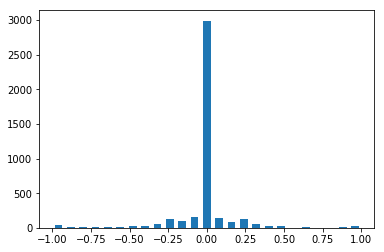

In [35]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))